# Color of Shapes

## MCC Group

### Abilene Christian University

_April 24, 2020_

In [14]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # For Color finder, including next three lines
from collections import Counter 
from skimage.color import rgb2lab, deltaE_cie76 
from skimage.io import imread, imshow # for edge features and next two lines
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline
import numpy as np
import argparse

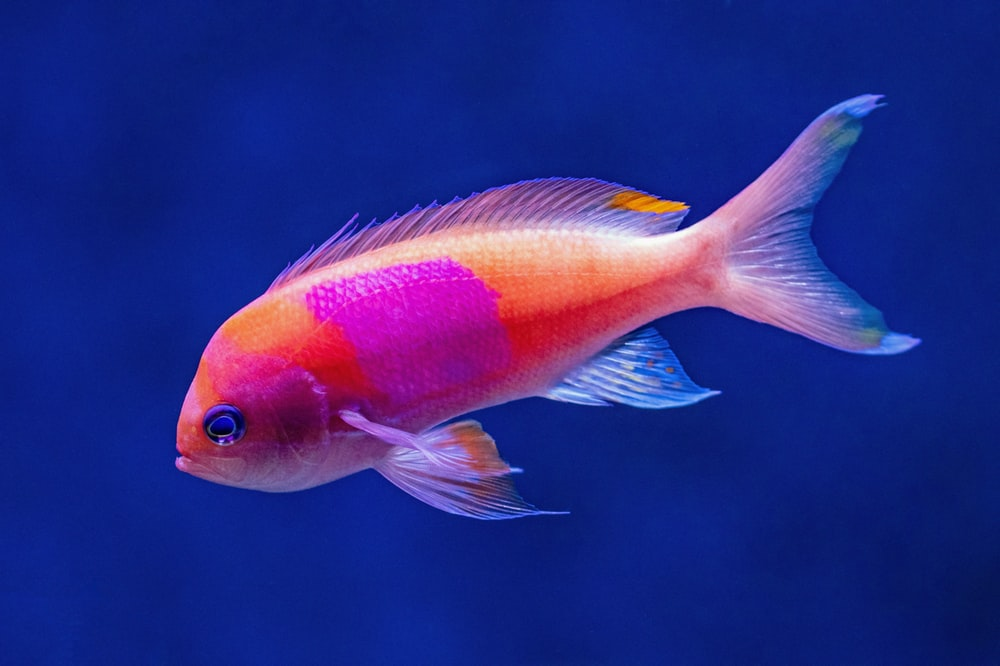

In [15]:
from IPython.display import Image
PATH = "/Users/thunderbird_flying_fortress/Desktop/"
Image(filename = PATH + 'fish.jpeg')

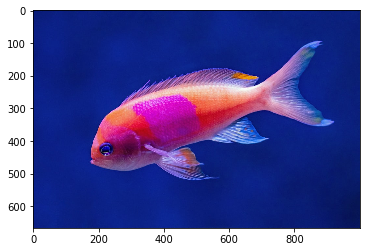

In [16]:
image = cv2.imread(filename = PATH + 'fish.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#### Code from https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

In [17]:
# Convert RGB to hex so we can label it for a pie chart
def RGB2HEX(color):
 return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [18]:
# Get image in RGB space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
# This guy figured out how to resize the image to find color
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [20]:
# Something about clusters to fit and predict on picture itself
# This code took a hot second
number_of_colors = 10
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

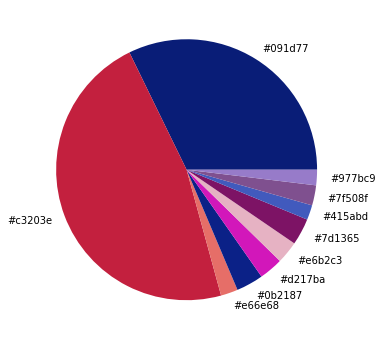

In [21]:
# Fit and predict data
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

show_chart = 90000
if (show_chart):
  plt.figure(figsize = (8, 6))
  plt.pie(counts.values(), labels = hex_colors, colors = hex_colors) 
# return rgb_colors

# Extracting pixels to Training Data

Code from https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

((666, 1000, 3), <matplotlib.image.AxesImage at 0x1a2338fc10>)

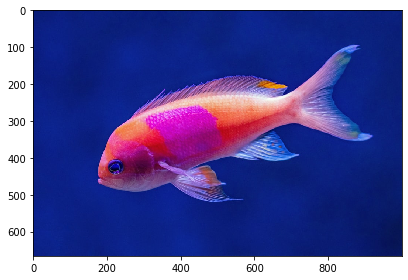

In [22]:
# Pixels from image
# image
# Array size of Image
# image.shape

# Image Shape
image.shape, imshow(image)

In [23]:
# pixel features
features = np.reshape(image, (666*1000*3))
features.shape

(1998000,)

# How to get pixel values from colors?

Code thanks to: https://stackoverflow.com/questions/138250/how-to-read-the-rgb-value-of-a-given-pixel-in-python

Other code looked at: https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

In [24]:
import os, sys
from PIL import Image
im = Image.open('fish.jpeg')
x = 3
y = 4

pix = im.load()
print(pix[x,y])

(9, 28, 120)


In [25]:
im = Image.open('fish.jpeg', 'r')
width, height = im.size
pixel_values = list(im.getdata())

In [26]:
pixel_values[width*y+x]

(9, 28, 120)

In [27]:
pixel_values = np.array(pixel_values).reshape((width, height, 3))
x, y = 0, 1
pixel_values[x][y]

array([  9,  29, 118])

In [40]:
def get_image(image_path):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, 'r')
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == 'RGB':
        channels = 3
    elif image.mode == 'L':
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((width, height, channels))
    return pixel_values

In [48]:
im = get_image('fish.jpeg')
im, im.shape # shows pixel values per value [x][y]
features = np.reshape(im, 1000*666*3)
features.shape

(1998000,)

# Using Keaton's Contours to Find Colors inside

In [30]:
# From Keaton's code
# sorting contours
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_img,175,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
img_contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
img_contours = sorted(img_contours, key=cv2.contourArea)

# runs through and rejects some regions
Amax = 0
m = 0
for i in img_contours:
  if cv2.contourArea(i) > Amax:
    Amax =  cv2.contourArea(i)
    m = i
# for i in img_contours:
#     if cv2.contourArea(i) > Amax:
#       break

mask = np.zeros(image.shape[:2], np.uint8)

cv2.drawContours(mask, [m], -1,255,-1)

invimg = cv2.bitwise_not(image)

new_not = cv2.bitwise_not(image,image, mask = mask) #takes out subject
new_and = cv2.bitwise_and(image,image, mask = mask) # takes out background
new_or = cv2.bitwise_or(image,image, mask = mask) # also takes out background
new_xor = cv2.bitwise_xor(image,image, mask = mask) # takes out everything


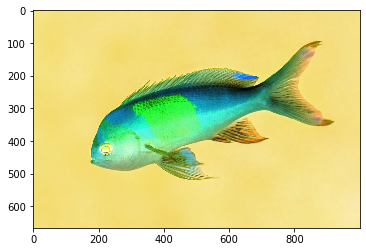

In [31]:
image2 = plt.imshow(new_and)
plt.show()

# Do Pie chart for this guy

In [32]:
# Convert RGB to hex so we can label it for a pie chart
def RGB2HEX(color):
 return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [33]:
# Get image in RGB space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    return image

In [34]:
# This guy figured out how to resize the image to find color
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [35]:
# Something about clusters to fit and predict on picture itself
# This code took a hot second
number_of_colors = 10
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

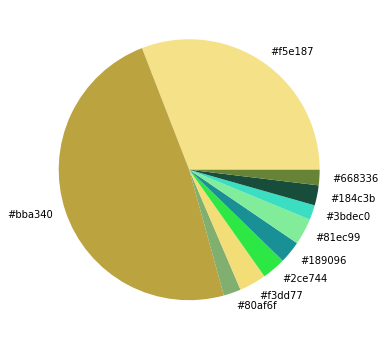

In [36]:
# Fit and predict data
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

show_chart = 90000
if (show_chart):
  plt.figure(figsize = (8, 6))
  plt.pie(counts.values(), labels = hex_colors, colors = hex_colors) 
# return rgb_colors